In [ ]:
# Downloading the dataset from Kaggle
!pip install -q kaggle
from google.colab import files

# choose the kaggle.json file that you downloaded
files.upload()
!mkdir ~/.kaggle

# make a directory named kaggle and copy the kaggle.json file there
!cp kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

# download the dataset for a specific competition
!kaggle competitions download -c 'State-Farm-Distracted-Driver-Detection'

Saving kaggle.json to kaggle (1).json
100% 4.00G/4.00G [03:14<00:00, 24.4MB/s]
100% 4.00G/4.00G [03:14<00:00, 22.1MB/s]


# New Section

In [ ]:
#!unzip State-Farm-Distracted-Driver-Detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  inflating: imgs/train/c7/img_57559.jpg  
  infla

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Collab/Kaggles/
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Collab/Kaggles
/content/drive/MyDrive/Collab/Kaggles


In [ ]:
import torch
from torchvision import transforms as T
from torchvision import datasets
import torchvision.models as models
from torch import nn, optim
from sklearn.metrics import cohen_kappa_score

import config
from utils import (
    check_accuracy,
    make_prediction # for submission file
)

from plot_losses_accur import plot_losses, plot_accuracy
from train import train_one_epoch

In [ ]:
!ls ./imgs

test  test1


In [ ]:
# Dataset 
from dataset import load_datasets

train_root = './state-farm-distracted-driver-detection/imgs/train_small'
test_root = './state-farm-distracted-driver-detection/imgs/test_small'
train_dataset_loader, val_loader, test_loader = load_datasets(train_root, test_root)

Size of test dataset  4


In [ ]:
print(config.DEVICE)

cpu


In [ ]:
# Using the GPU with PyTorch
if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device('cpu')
print("Using {}.".format(device_name))


Using cpu.


In [ ]:


#model = models.mobilenet_v2(pretrained=True)
model = models.resnet50(pretrained=True) # GPU 1
num_ftrs = model.fc.in_features
class_names = 10 #len(train_ds)
model.fc = nn.Linear(num_ftrs, class_names)

model = model.to(config.DEVICE) # GPU 2
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY)
# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
#scaler

loss_train_history = []
loss_val_history = []
accur_train_history = []
accur_val_history = []

config.NUM_EPOCHS = 10

for epoch in range(config.NUM_EPOCHS):
    print("Run epoch ", epoch)
    ave_loss_per_epoch, train_accuracy = train_one_epoch(train_dataset_loader,model, optimizer,loss_fn,config.DEVICE)
    loss_train_history.append(ave_loss_per_epoch)
    accur_train_history.append((train_accuracy))

    # get on validation
    #preds, labels = check_accuracy(val_loader, model, config.DEVICE)
    #print(f"QuadraticWeightedKappa (Validation): {cohen_kappa_score(labels, preds, weights='quadratic')}")

    # get on train
    ab, val_accuracy, val_loss = check_accuracy(train_dataset_loader, model, loss_fn, config.DEVICE)
    accur_val_history.append(val_accuracy)
    loss_val_history.append(val_loss)
    #print(f"QuadraticWeightedKappa (Training): {cohen_kappa_score(labels, preds, weights='quadratic')}")
    print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (ave_loss_per_epoch, train_accuracy, val_accuracy))


SAVE_MODEL = True
if SAVE_MODEL:
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    #save_checkpoint(checkpoint, filename=f"b3_{epoch}.pth.tar")
    filename="my_small_trained.pth.tar"
    
    torch.save(checkpoint, filename)

Run epoch  0
Average loss: 2.408891, Train accuracy: 0.083333, Val accuracy: 0.250000
Run epoch  1
Average loss: 1.889460, Train accuracy: 0.541667, Val accuracy: 0.625000
Run epoch  2
Average loss: 1.645447, Train accuracy: 0.958333, Val accuracy: 0.708333
Run epoch  3
Average loss: 1.590971, Train accuracy: 0.916667, Val accuracy: 0.916667
Run epoch  4
Average loss: 1.239622, Train accuracy: 1.000000, Val accuracy: 1.000000
Run epoch  5
Average loss: 1.189550, Train accuracy: 0.958333, Val accuracy: 1.000000
Run epoch  6
Average loss: 1.161280, Train accuracy: 1.000000, Val accuracy: 1.000000
Run epoch  7
Average loss: 0.899094, Train accuracy: 1.000000, Val accuracy: 1.000000
Run epoch  8
Average loss: 0.976542, Train accuracy: 1.000000, Val accuracy: 1.000000
Run epoch  9
Average loss: 0.844969, Train accuracy: 1.000000, Val accuracy: 1.000000


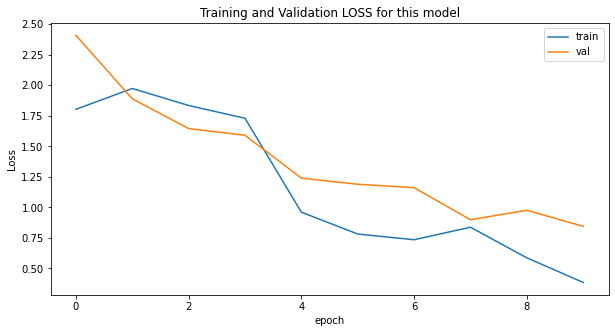

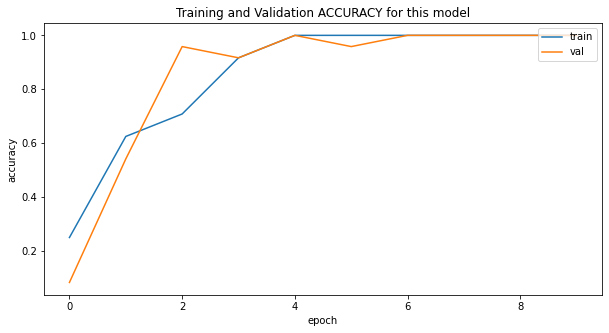

In [ ]:
plot_losses(loss_val_history, loss_train_history) #val, train
plot_accuracy(accur_val_history, accur_train_history)

In [ ]:
!cd /content/drive/MyDrive/Collab/Kaggles/


In [ ]:
!find . -name submission.csv

find: ‘./imgs/test’: Input/output error


In [ ]:
SAVE_MODEL = True
if SAVE_MODEL:
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    #save_checkpoint(checkpoint, filename=f"b3_{epoch}.pth.tar")
    filename="my_small_trained.pth.tar"
    
    torch.save(checkpoint, filename)


In [ ]:
print("=> Loading checkpoint")
CHECKPOINT_FILE = "my_small_trained.pth.tar"

checkpoint = torch.load(CHECKPOINT_FILE)

model.load_state_dict(checkpoint["state_dict"])
#optimizer.load_state_dict(checkpoint["optimizer"])

# If we don't do this then it will just have learning rate of old checkpoint
# and it will lead to many hours of debugging \:
for param_group in optimizer.param_groups:
    param_group["lr"] = config.LEARNING_RATE

=> Loading checkpoint


In [ ]:
make_prediction(model, test_loader) # output_csv="submission.csv"

100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

Done with predictions
